This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
938/938 [==============================] - 13s 4ms/step - loss: 0.1503 - accuracy: 0.9533
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0299 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9944


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9909
Test accuracy: 0.991


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kruthitatavarthy","key":"af0002d55633c04c22e142f554efe8dd"}'}

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:35<00:00, 25.6MB/s]
100% 812M/812M [00:35<00:00, 24.0MB/s]


In [12]:
!unzip -qq dogs-vs-cats.zip

In [13]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [14]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Data preprocessing

Using image_dataset_from_directory to read images

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [20]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

Fitting the model using a Dataset

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 82ms/step - loss: 0.7326 - accuracy: 0.5225 - val_loss: 0.6925 - val_accuracy: 0.5210
Epoch 2/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6941 - accuracy: 0.5110 - val_loss: 0.6875 - val_accuracy: 0.5420
Epoch 3/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6902 - accuracy: 0.5850 - val_loss: 0.6238 - val_accuracy: 0.6640
Epoch 4/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6212 - accuracy: 0.6435 - val_loss: 0.6300 - val_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6153 - accuracy: 0.6815 - val_loss: 0.6120 - val_accuracy: 0.6480
Epoch 6/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5745 - accuracy: 0.7100 - val_loss: 0.5897 - val_accuracy: 0.6890
Epoch 7/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5429 - accuracy: 0.7300 - val_loss: 0.5672 - val_accuracy: 0.7050
Epoch 8/30
63

Displaying curves of loss and accuracy during training

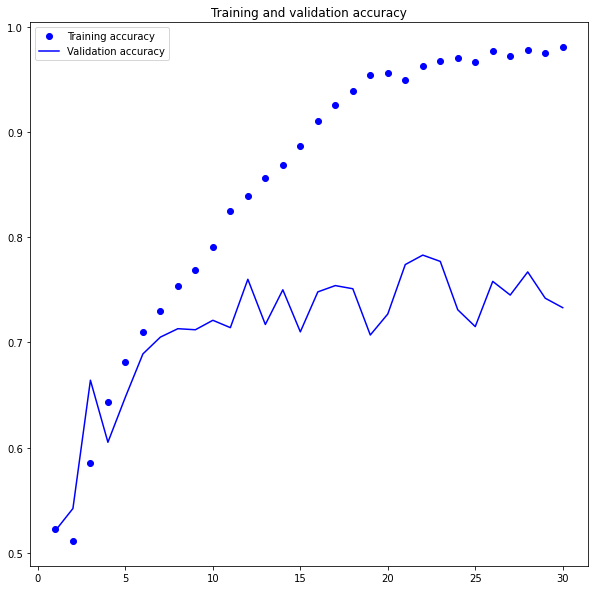

<Figure size 432x288 with 0 Axes>

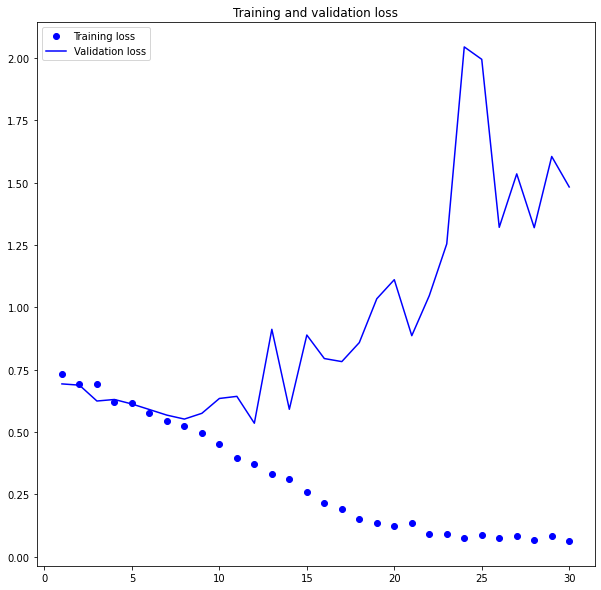

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [27]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 35ms/step - loss: 0.5887 - accuracy: 0.7330
Test accuracy: 0.733


Here we got training accurracy as 98.05%, validation accuracy as 76.4% and test accuracy 73.3%

Question 2

Using data augmentation

Define a data augmentation stage to add to an image model

In [28]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Here I have increased training sample size to 1500 and keeping the validation and test sample size to 500 each as before
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training images

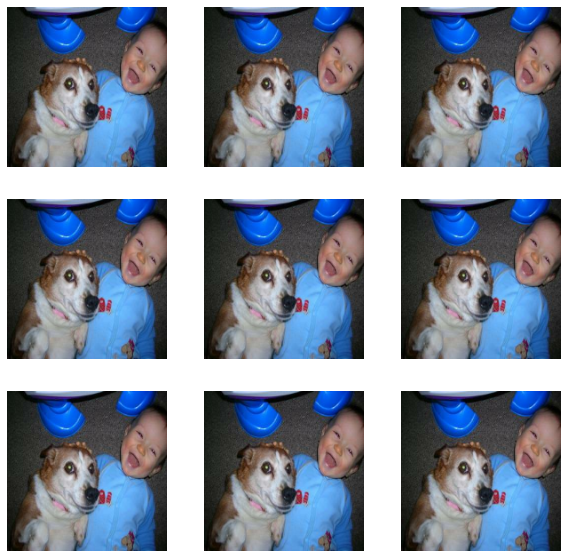

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [31]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Regularized convnet Training

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 8s 108ms/step - loss: 0.7365 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 6s 95ms/step - loss: 0.6998 - accuracy: 0.5355 - val_loss: 0.6887 - val_accuracy: 0.5260
Epoch 3/20
63/63 [==============================] - 8s 116ms/step - loss: 0.7075 - accuracy: 0.5425 - val_loss: 0.6664 - val_accuracy: 0.6250
Epoch 4/20
63/63 [==============================] - 8s 118ms/step - loss: 0.6741 - accuracy: 0.5890 - val_loss: 0.6231 - val_accuracy: 0.6440
Epoch 5/20
63/63 [==============================] - 7s 106ms/step - loss: 0.6537 - accuracy: 0.6395 - val_loss: 0.6603 - val_accuracy: 0.5750
Epoch 6/20
63/63 [==============================] - 6s 96ms/step - loss: 0.6275 - accuracy: 0.6660 - val_loss: 0.5951 - val_accuracy: 0.6750
Epoch 7/20
63/63 [==============================] - 6s 96ms/step - loss: 0.6166 - accuracy: 0.6555 - val_loss: 0.8985 - val_accuracy: 0.5810
Epoch 8/2

Evaluation of the model on training set

In [33]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 35ms/step - loss: 0.5673 - accuracy: 0.7500
Test accuracy: 0.750


We got training accuracy 75.15% and validation accuracy 77.1% and test accuracy 75.0%

Question 3

In [34]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#As increasing the sample size is always good than decreasing, here we're increasing the training the sample size to 2000
make_subset("train", start_index=0, end_index=2000)
#validation and test sample size 500 each
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [35]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 8s 100ms/step - loss: 0.6969 - accuracy: 0.5040 - val_loss: 0.6917 - val_accuracy: 0.5010
Epoch 2/20
63/63 [==============================] - 6s 97ms/step - loss: 0.6926 - accuracy: 0.5155 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 6s 95ms/step - loss: 0.6949 - accuracy: 0.5145 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 9s 139ms/step - loss: 0.6912 - accuracy: 0.5315 - val_loss: 0.6748 - val_accuracy: 0.5390
Epoch 5/20
63/63 [==============================] - 7s 101ms/step - loss: 0.6895 - accuracy: 0.5365 - val_loss: 0.6831 - val_accuracy: 0.5350
Epoch 6/20
63/63 [==============================] - 8s 123ms/step - loss: 0.6704 - accuracy: 0.5950 - val_loss: 0.6522 - val_accuracy: 0.6200
Epoch 7/20
63/63 [==============================] - 6s 98ms/step - loss: 0.6576 - accuracy: 0.6120 - val_loss: 0.6484 - val_accuracy: 0.6100
Epoch 8/2

In [37]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 55ms/step - loss: 0.5621 - accuracy: 0.7150
Test accuracy: 0.715


Training accuracy of 54.8% and validation accuracy of 67.7% and test accuracy 71.5%

Question 4

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [38]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step


In [41]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [42]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 17.9102 - accuracy: 0.9250 - val_loss: 17.3892 - val_accuracy: 0.9140
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 4.9016 - accuracy: 0.9685 - val_loss: 8.5235 - val_accuracy: 0.9570
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7103 - accuracy: 0.9855 - val_loss: 4.9459 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8731 - accuracy: 0.9885 - val_loss: 4.8860 - val_accuracy: 0.9720
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9395 - accuracy: 0.9935 - val_loss: 9.3040 - val_accuracy: 0.9580
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.9935 - val_loss: 7.3661 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6172 - accuracy: 0.9940 - val_loss: 6.3110 - val_accuracy: 0.9770
Epoch 8/20
63/63 

**Plotting the results**

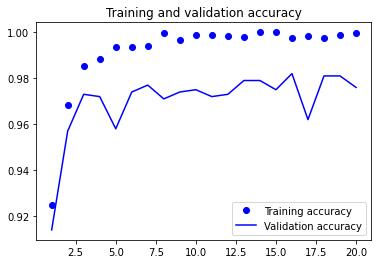

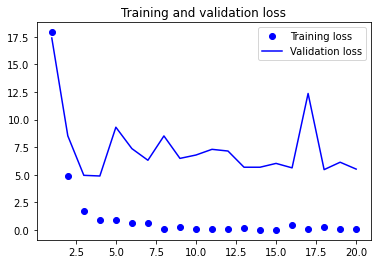

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [44]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [45]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [46]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 15s 217ms/step - loss: 22.2862 - accuracy: 0.8905 - val_loss: 4.3825 - val_accuracy: 0.9680
Epoch 2/10
63/63 [==============================] - 14s 220ms/step - loss: 8.0200 - accuracy: 0.9455 - val_loss: 5.6012 - val_accuracy: 0.9720
Epoch 3/10
63/63 [==============================] - 15s 229ms/step - loss: 5.6203 - accuracy: 0.9585 - val_loss: 5.3232 - val_accuracy: 0.9680
Epoch 4/10
63/63 [==============================] - 14s 217ms/step - loss: 5.5796 - accuracy: 0.9560 - val_loss: 5.3364 - val_accuracy: 0.9710
Epoch 5/10
63/63 [==============================] - 14s 219ms/step - loss: 5.2201 - accuracy: 0.9625 - val_loss: 3.3058 - val_accuracy: 0.9760
Epoch 6/10
63/63 [==============================] - 15s 230ms/step - loss: 4.5829 - accuracy: 0.9660 - val_loss: 4.3337 - val_accuracy: 0.9700
Epoch 7/10
63/63 [==============================] - 13s 207ms/step - loss: 4.4557 - accuracy: 0.9660 - val_loss: 6.7988 - val_accuracy: 0.970

**Evaluating the model on the test set**

In [49]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 115ms/step - loss: 4.8664 - accuracy: 0.9760
Test accuracy: 0.976


### Fine-tuning a pretrained model

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [51]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [52]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 17s 236ms/step - loss: 1.9705 - accuracy: 0.9820 - val_loss: 2.8378 - val_accuracy: 0.9780
Epoch 2/10
63/63 [==============================] - 15s 241ms/step - loss: 1.6534 - accuracy: 0.9775 - val_loss: 2.1222 - val_accuracy: 0.9830
Epoch 3/10
63/63 [==============================] - 15s 236ms/step - loss: 0.8933 - accuracy: 0.9850 - val_loss: 2.2962 - val_accuracy: 0.9830
Epoch 4/10
63/63 [==============================] - 15s 229ms/step - loss: 0.7850 - accuracy: 0.9860 - val_loss: 2.8500 - val_accuracy: 0.9810
Epoch 5/10
63/63 [==============================] - 15s 228ms/step - loss: 1.0258 - accuracy: 0.9815 - val_loss: 2.3522 - val_accuracy: 0.9820
Epoch 6/10
63/63 [==============================] - 15s 235ms/step - loss: 0.6463 - accuracy: 0.9880 - val_loss: 1.9808 - val_accuracy: 0.9800
Epoch 7/10
63/63 [==============================] - 15s 238ms/step - loss: 0.8230 - accuracy: 0.9885 - val_loss: 1.8735 - val_accuracy: 0.9800

In [53]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 5s 119ms/step - loss: 2.2432 - accuracy: 0.9810
Test accuracy: 0.981


## Summary

I started with a tiny convnet with 1000 training samples, 500 for validation and 500 for testing, with no optimization. The accuracy is therefore only 68.3% because of overfitting. Later, data augmentation, early pausing, dropout, and accuracy loss of 76.2% were introduced.

model preparation without augmentation Compared to a model created from scratch, a pretrained model is more accurate. This validation accuracy was 96.7%, which is significantly higher than the accuracy we would have obtained by starting from scratch.

model that has been educated and enhanced Here, the validation accuracy went from 97.6% to 98.1% with a small improvement.

Test accuracy was 98.1% when a predefined model with fine adjustment was used.

I would like to make a point that accuracy of the model while Using Runtime GPU is a bit higher than the model without using the it.